In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub


In [8]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

In [7]:

path = kagglehub.dataset_download("asinow/car-price-dataset",)

file = '/car_price_dataset.csv'

path_file = path + file

print("Path to dataset files:", path_file)

100%|██████████| 135k/135k [00:00<00:00, 29.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/asinow/car-price-dataset/versions/1/car_price_dataset.csv


CARGA DATASET

In [9]:
car_df = pd.read_csv(path_file)
car_df.head(2)

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092


1 - VALIDACIÓN DE DATOS Y ANALISIS DE NULOS

In [10]:
car_df.dtypes

,0
Brand,object
Model,object
Year,int64
Engine_Size,float64
Fuel_Type,object
Transmission,object
Mileage,int64
Doors,int64
Owner_Count,int64
Price,int64


cuantas columnas tenemos de cada tipo de dato

In [11]:
car_df.dtypes.value_counts()

,count
int64,5
object,4
float64,1


¿ CUÁNTAS VARIABLES (filas) Y OBSERVACIONES (columnas) TENEMOS EN EL CONJUNTO DE DATOS?

In [12]:
car_df.shape

(10000, 10)

¿EXISTEN VALORES NULOS EXPLICITOS EN EL COJUNTO DE DATOS?

In [23]:
car_df.isnull().sum().sort_values(ascending=False)

,0
Brand,0
Model,0
Year,0
Engine_Size,0
Fuel_Type,0
Transmission,0
Mileage,0
Doors,0
Owner_Count,0
Price,0


In [24]:
car_df.isnull().any()

,0
Brand,False
Model,False
Year,False
Engine_Size,False
Fuel_Type,False
Transmission,False
Mileage,False
Doors,False
Owner_Count,False
Price,False


3 CONTEOS y CORRELACIONES

In [14]:
count_by_year = car_df.groupby('Year').size().reset_index(name='Count')
count_by_year

,Year,Count
0,2000,393
1,2001,406
2,2002,462
3,2003,381
4,2004,394
5,2005,431
6,2006,415
7,2007,430
8,2008,382
9,2009,399


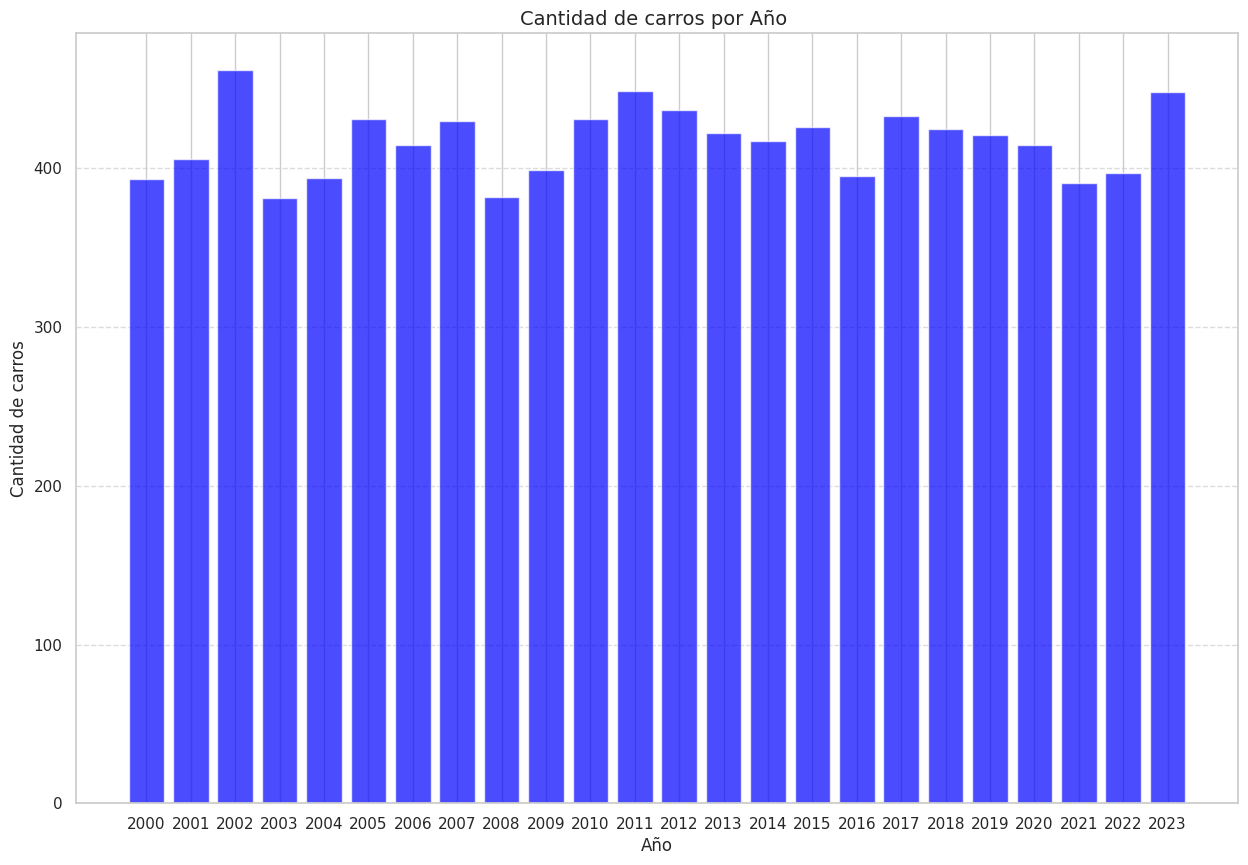

In [18]:
# Crear gráfico de barras
plt.figure(figsize=(15,10))
plt.bar(count_by_year['Year'], count_by_year['Count'], color='blue', alpha=0.7)

# Personalizar el gráfico
plt.title("Cantidad de carros por Año ", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Cantidad de carros", fontsize=12)
plt.xticks(count_by_year['Year'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar gráfico
plt.show()

In [27]:
car_df.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


In [28]:
car_df.describe(include=object)

,Brand,Model,Fuel_Type,Transmission
count,10000,10000,10000,10000
unique,10,30,4,3
top,Ford,Accord,Electric,Manual
freq,1048,365,2625,3372


In [30]:
count_by_brand = car_df.groupby('Brand').size().reset_index(name='Count').sort_values(by='Count', ascending=False)
count_by_brand

,Brand,Count
3,Ford,1048
0,Audi,1038
9,Volkswagen,1020
4,Honda,1009
2,Chevrolet,1003
1,BMW,999
5,Hyundai,995
6,Kia,976
8,Toyota,970
7,Mercedes,942


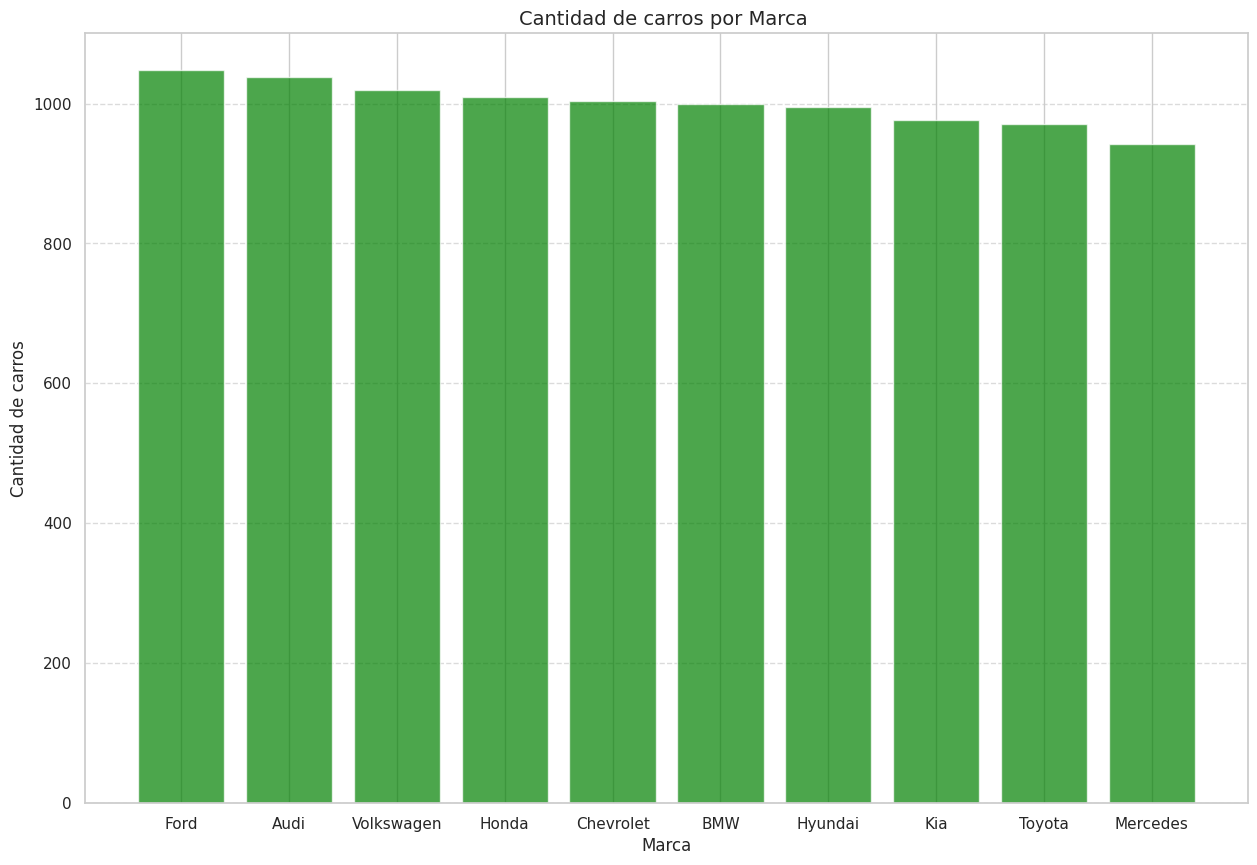

In [32]:
# Crear gráfico de barras
plt.figure(figsize=(15,10))
plt.bar(count_by_brand['Brand'], count_by_brand['Count'], color='green', alpha=0.7)

# Personalizar el gráfico
plt.title("Cantidad de carros por Marca ", fontsize=14)
plt.xlabel("Marca", fontsize=12)
plt.ylabel("Cantidad de carros", fontsize=12)
plt.xticks(count_by_brand['Brand'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar gráfico
plt.show()

proporcion de marcas

In [33]:
car_df['variable']=""
car_df

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price,variable
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501,
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092,
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171,
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780,
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867,
...,...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884,
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240,
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866,
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084,


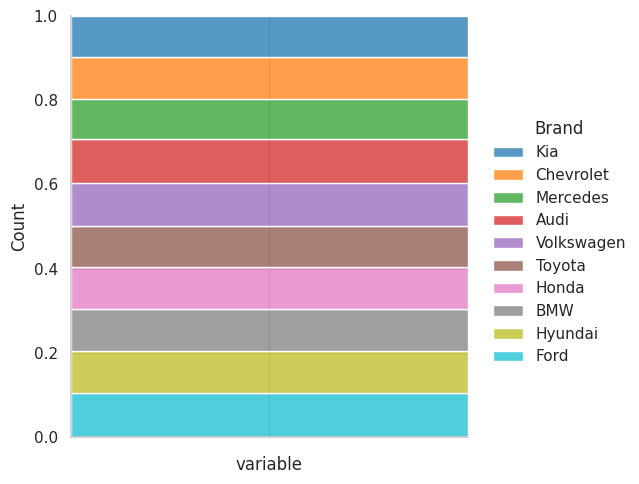

In [34]:
(
    car_df.
    pipe(
        lambda dfp: (
            sns.displot(
                data=dfp,
                x="variable",
                hue="Brand",
                multiple="fill"
            )
        )
    )
)

3.2 CORRELACIÓN DE VARIABLES NÚMERICAS

In [19]:
data=car_df.corr(numeric_only=True),
data

(                 Year  Engine_Size   Mileage     Doors  Owner_Count     Price
 Year         1.000000    -0.001306 -0.002476  0.014867     0.000116  0.663036
 Engine_Size -0.001306     1.000000  0.015135 -0.009844     0.007122  0.357403
 Mileage     -0.002476     0.015135  1.000000  0.007879     0.006287 -0.551227
 Doors        0.014867    -0.009844  0.007879  1.000000    -0.005431  0.000511
 Owner_Count  0.000116     0.007122  0.006287 -0.005431     1.000000  0.002656
 Price        0.663036     0.357403 -0.551227  0.000511     0.002656  1.000000,)

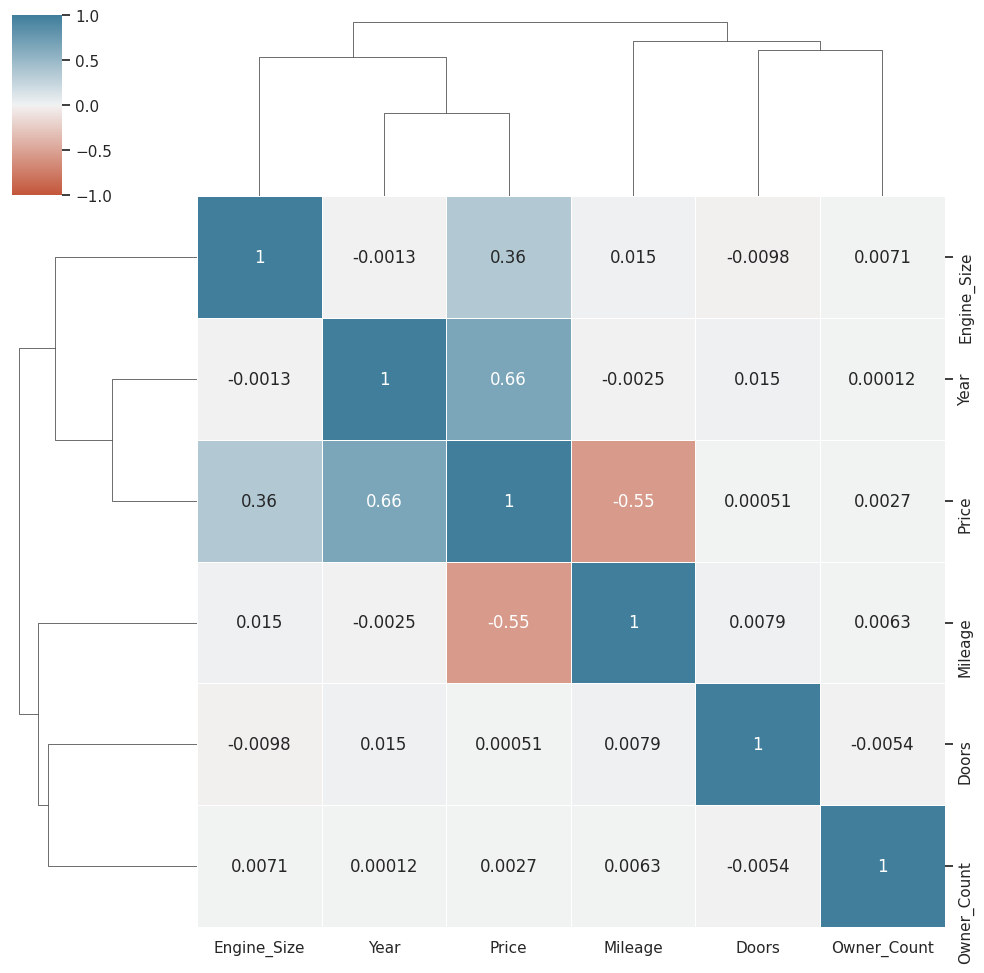

In [20]:
sns.clustermap(
    data=car_df.corr(numeric_only=True),
    cmap=sns.diverging_palette(20,230,as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={'shrink':0.5},
    annot=True
)

4 MEDIDAS DE TENDENCIA CENTRAL Y DISPERSIÓN

In [21]:
car_df.mean(numeric_only=True)

,0
Year,2011.54370
Engine_Size,3.00056
Mileage,149239.11180
Doors,3.49710
Owner_Count,2.99110
Price,8852.96440


graficos de medida  de tendencia central y dispercion de la variable dependendiente = price  

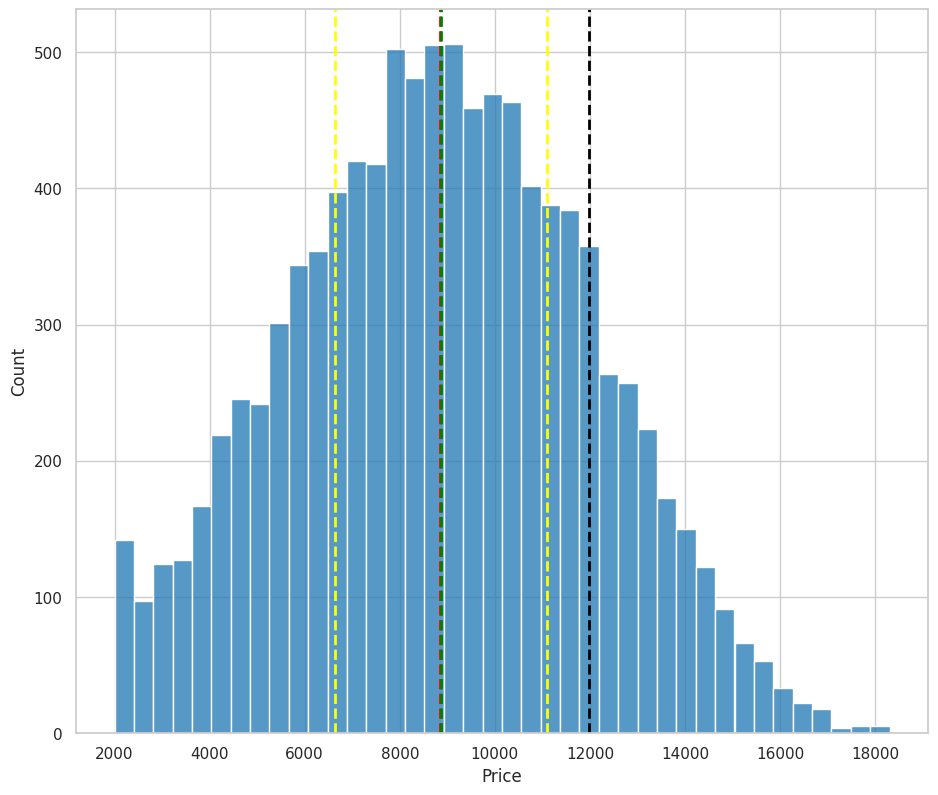

In [25]:
df = car_df
variable = 'Price'
sns.histplot(
    data=df,
    x=variable
)
plt.axvline(
    x=df[variable].mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=df[variable].median(),
    color='green',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=df[variable].median() +df[variable].std(),
    color='black',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=df[variable].quantile(0.25),
    color='yellow',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=df[variable].quantile(0.75),
    color='yellow',
    linestyle='dashed',
    linewidth=2
)

<Axes: xlabel='Price'>

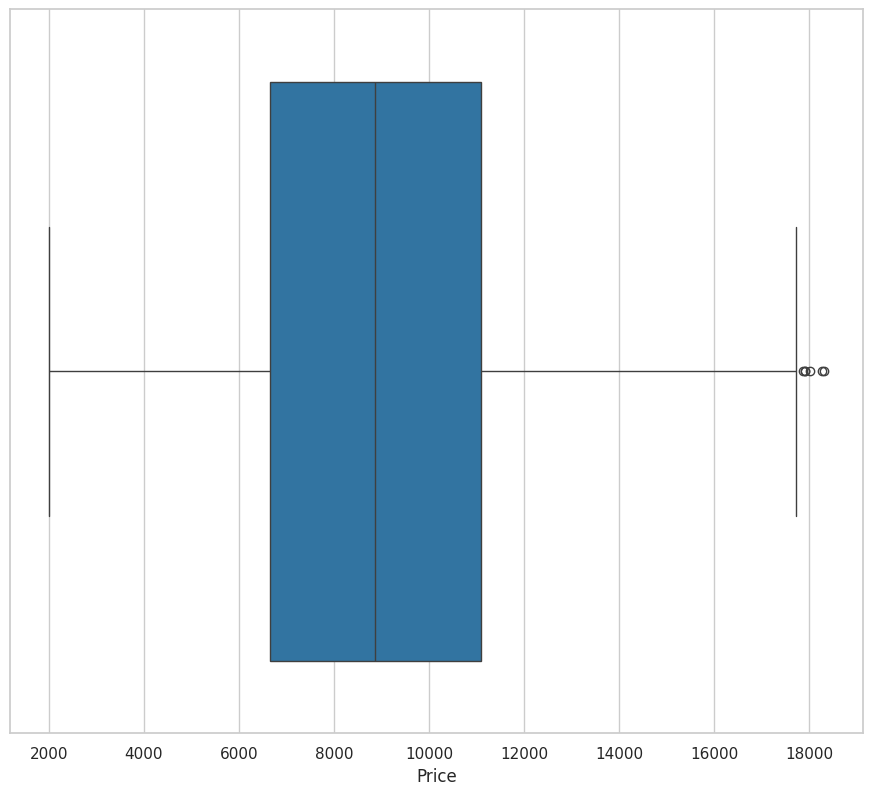

In [26]:
sns.boxplot(x=df[variable])

correlaciones variables categoricas

In [36]:
car_df["Brand"].unique()

array(['Kia', 'Chevrolet', 'Mercedes', 'Audi', 'Volkswagen', 'Toyota',
       'Honda', 'BMW', 'Hyundai', 'Ford'], dtype=object)

In [37]:
car_df["Fuel_Type"].unique()

array(['Diesel', 'Hybrid', 'Electric', 'Petrol'], dtype=object)

In [38]:
car_df["Transmission"].unique()

array(['Manual', 'Automatic', 'Semi-Automatic'], dtype=object)

In [44]:
car_df = (
    car_df.
    assign(
        numeric_brand = lambda df: df.Brand.replace(car_df['Brand'].unique(), [0,1,2,3,4,5,6,7,8,9]),
        numeric_Fuel_Type = lambda df: df.Fuel_Type.replace(car_df['Fuel_Type'].unique(), [0,1,2,3]),
        numeric_Transmission = lambda df: df.Transmission.replace(car_df['Transmission'].unique(), [0,1,2])
        )
)
car_df

<ipython-input-44-fb8dcbc028af>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numeric_brand = lambda df: df.Brand.replace(car_df['Brand'].unique(), [0,1,2,3,4,5,6,7,8,9]),
<ipython-input-44-fb8dcbc028af>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numeric_Fuel_Type = lambda df: df.Fuel_Type.replace(car_df['Fuel_Type'].unique(), [0,1,2,3]),
<ipython-input-44-fb8dcbc028af>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `re

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price,variable,numeric_brand,numeric_Fuel_Type,numeric_Transmission
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501,,0,0,0
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092,,1,1,1
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171,,2,0,1
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780,,3,2,0
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867,,4,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884,,0,0,2
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240,,1,2,1
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866,,7,3,1
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084,,9,1,1


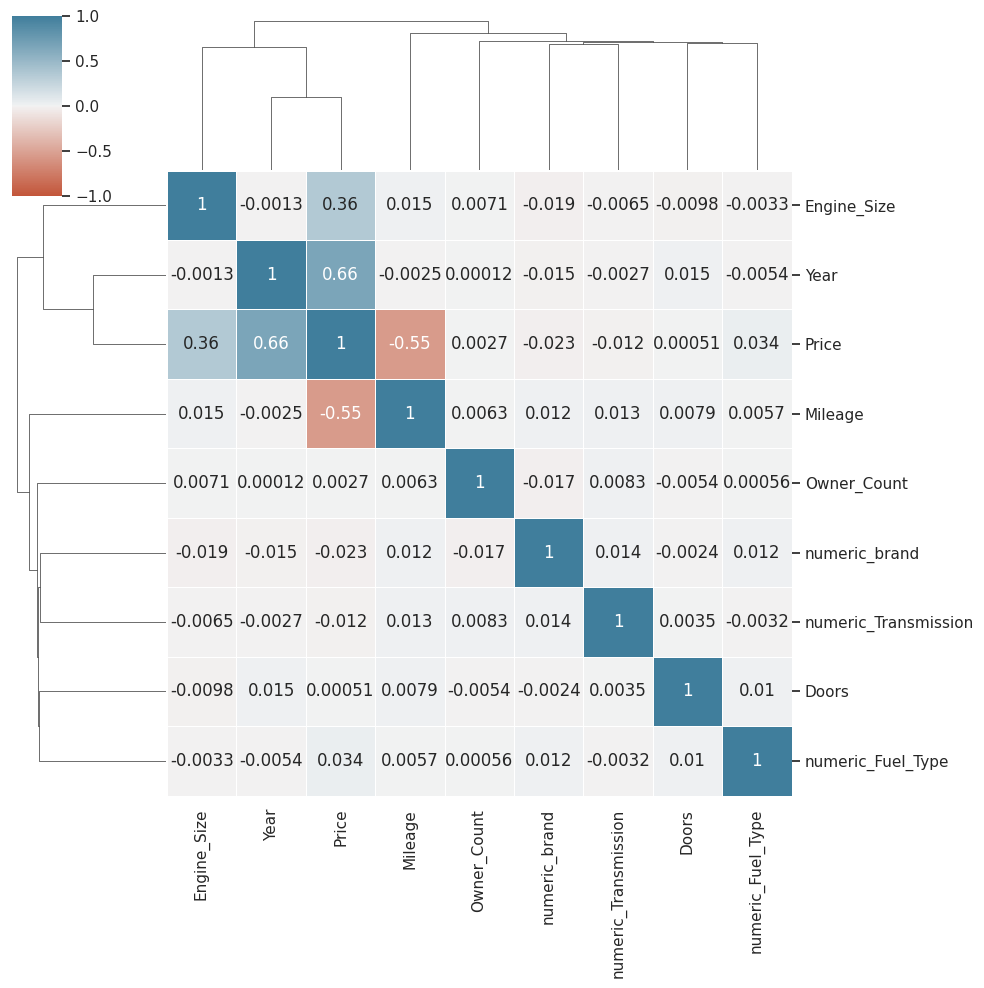

In [45]:
sns.clustermap(
    data=car_df.corr(numeric_only=True),
    cmap=sns.diverging_palette(20,230,as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={'shrink':0.5},
    annot=True
)

analisi bivariable con año y precio

<Axes: xlabel='Year', ylabel='Price'>

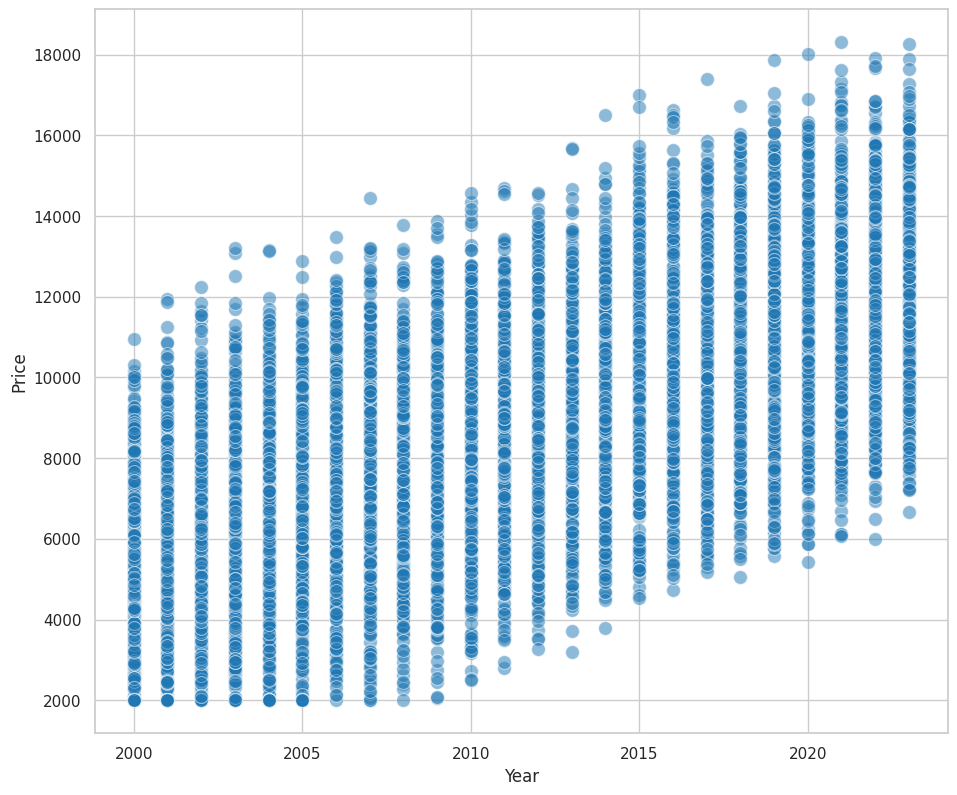

In [47]:
sns.scatterplot(x='Year', y='Price', data=car_df, alpha=1/2, s=100)

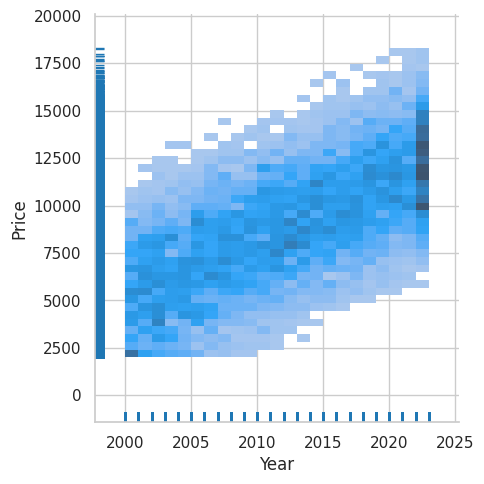

In [49]:
sns.displot(data=car_df, x="Year", y="Price", rug=True)

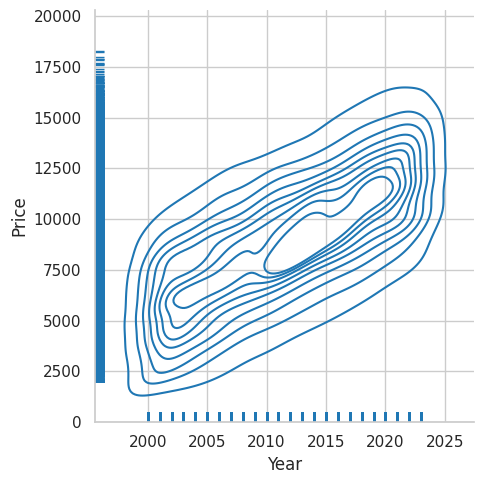

In [50]:
sns.displot(data=car_df, x="Year", y="Price", rug=True, kind='kde')

relacion entre categorico y numerico (marca , precio)

<Axes: xlabel='Brand', ylabel='Price'>

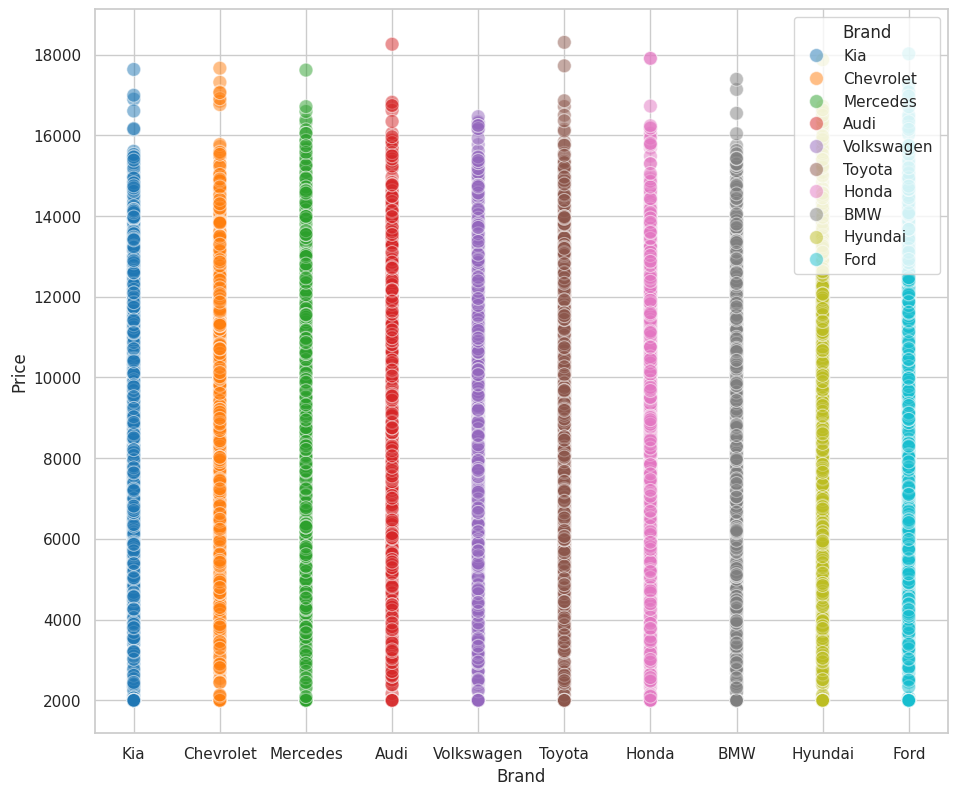

In [52]:
sns.scatterplot(x='Brand', y='Price', hue = "Brand", data=car_df, alpha=1/2, s=100)

<Axes: xlabel='Brand', ylabel='Price'>

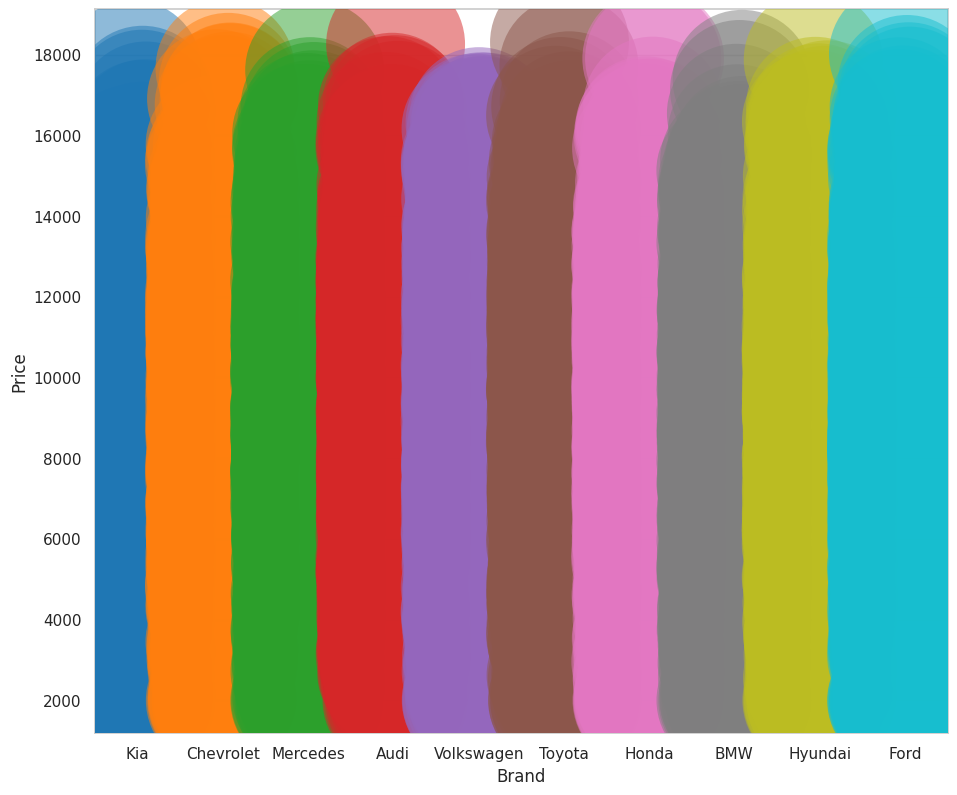

In [53]:
sns.stripplot(x='Brand', y='Price', hue = "Brand", data=car_df, alpha=1/2, s=100)

<ipython-input-56-217e0ca139c7>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, 'Kia'),
 Text(1, 0, 'Chevrolet'),
 Text(2, 0, 'Mercedes'),
 Text(3, 0, 'Audi'),
 Text(4, 0, 'Volkswagen'),
 Text(5, 0, 'Toyota'),
 Text(6, 0, 'Honda'),
 Text(7, 0, 'BMW'),
 Text(8, 0, 'Hyundai'),
 Text(9, 0, 'Ford')]

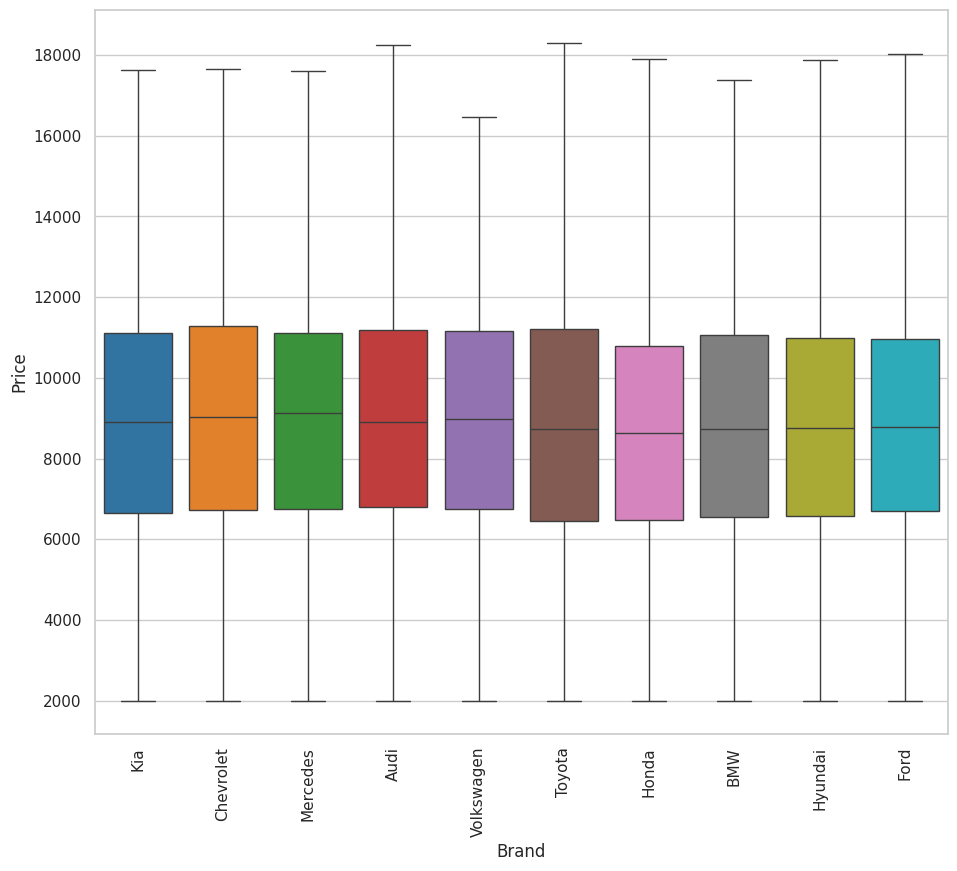

In [56]:
ax = sns.boxplot(x='Brand', y='Price', hue = "Brand" ,data=car_df, whis=np.inf)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)